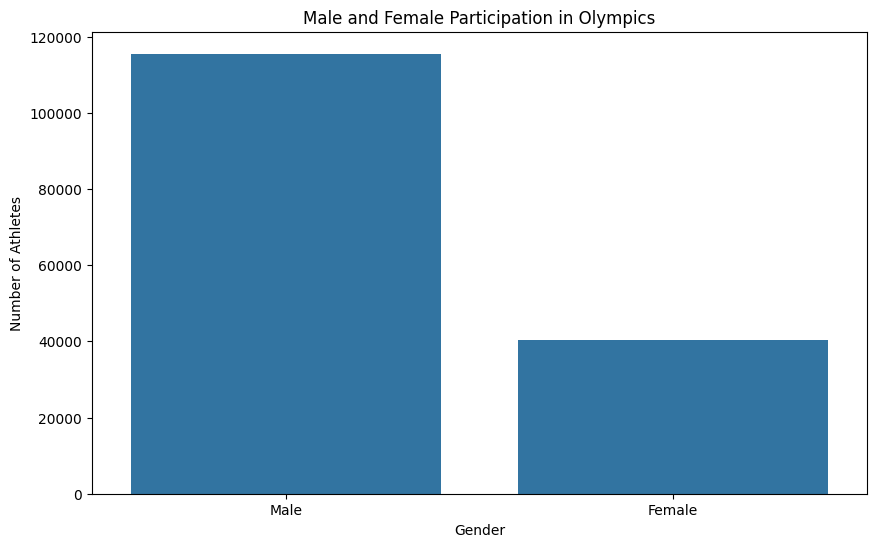

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Re-load the athlete_bio_df dataframe
athlete_bio_df = pd.read_csv('F:\CODE\olymics 2024\data\Olympic_Athlete_Bio.csv')

# 1. Male and Female Participation in the Olympics
participation_by_gender = athlete_bio_df['sex'].value_counts().reset_index()
participation_by_gender.columns = ['Gender', 'Number of Athletes']
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Number of Athletes', data=participation_by_gender)
plt.title('Male and Female Participation in Olympics')
plt.xlabel('Gender')
plt.ylabel('Number of Athletes')
plt.show()

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the necessary datasets
medal_tally = pd.read_csv('data\Olympic_Games_Medal_Tally.csv')
country_info = pd.read_csv('data\Olympics_Country.csv')


In [74]:
medal_tally_with_continent = pd.merge(medal_tally, country_info, left_on='country_noc', right_on='noc')

In [75]:
# Check the columns of the medal_tally_with_continent dataframe to find the correct column for continent
medal_tally_with_continent.columns

Index(['edition', 'edition_id', 'year', 'country_x', 'country_noc', 'gold',
       'silver', 'bronze', 'total', 'noc', 'country_y'],
      dtype='object')

In [76]:
# Check the unique values in the 'country_y' column to understand the structure
country_info['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australasia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bohemia', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'Chinese Taipei', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Crete', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Germany', 'Ecuador',
       'Egypt', 'El

In [77]:
# Check the unique values in the 'noc' column to understand the structure
country_info['noc'].unique()

array(['AFG', 'ALB', 'ALG', 'ASA', 'AND', 'ANG', 'ANT', 'ARG', 'ARM',
       'ARU', 'ANZ', 'AUS', 'AUT', 'AZE', 'BRN', 'BAN', 'BAR', 'BLR',
       'BEL', 'BIZ', 'BEN', 'BER', 'BHU', 'BOH', 'BOL', 'BIH', 'BOT',
       'BRA', 'IVB', 'BRU', 'BUL', 'BUR', 'BDI', 'CPV', 'CAM', 'CMR',
       'CAN', 'CAY', 'CAF', 'CHA', 'CHI', 'TPE', 'COL', 'COM', 'CGO',
       'COK', 'CRC', 'CIV', 'CRT', 'CRO', 'CUB', 'CYP', 'CZE', 'TCH',
       'PRK', 'COD', 'DEN', 'DJI', 'DMA', 'DOM', 'GDR', 'ECU', 'EGY',
       'ESA', 'GEQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FSM', 'FIJ', 'FIN',
       'FRA', 'GAB', 'GEO', 'GER', 'GHA', 'GBR', 'GRE', 'GRN', 'GUM',
       'GUA', 'GUI', 'GBS', 'GUY', 'HAI', 'HON', 'HKG', 'HUN', 'ISL',
       'IOA', 'IND', 'AIN', 'INA', 'IRQ', 'IRL', 'IRI', 'ISR', 'ITA',
       'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KSA', 'KIR', 'COR', 'KOS',
       'KUW', 'KGZ', 'LAO', 'LAT', 'LBN', 'LES', 'LBR', 'LBA', 'LIE',
       'LTU', 'LUX', 'MAD', 'MAW', 'MAL', 'MAS', 'MDV', 'MLI', 'MLT',
       'MHL', 'MTN',

In [78]:
# Check the columns of the country_info dataframe to find the correct column for continent
country_info.head()

,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra


In [79]:
# It seems the country_info dataframe does not have a continent column. We need to add this information manually.
# Let's create a mapping of countries to continents.

continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

# Create a reverse mapping from country to continent
country_to_continent = {country: continent for continent, countries in continent_mapping.items() for country in countries}

# Add the continent information to the country_info dataframe
country_info['Continent'] = country_info['country'].map(country_to_continent)

# Merge medal tally with country info to get continent information
medal_tally_with_continent = pd.merge(medal_tally, country_info, left_on='country_noc', right_on='noc')


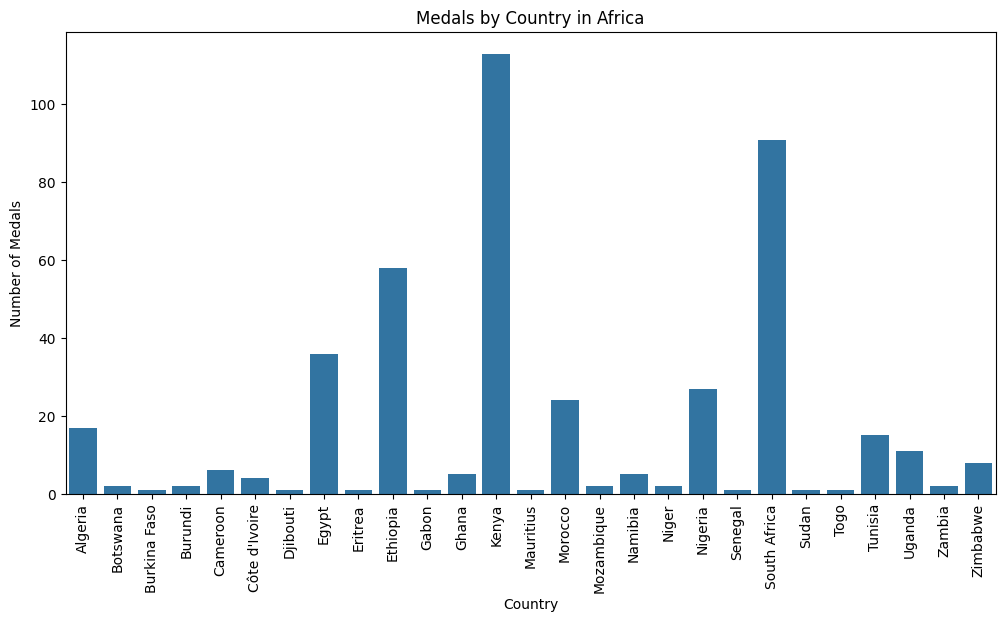

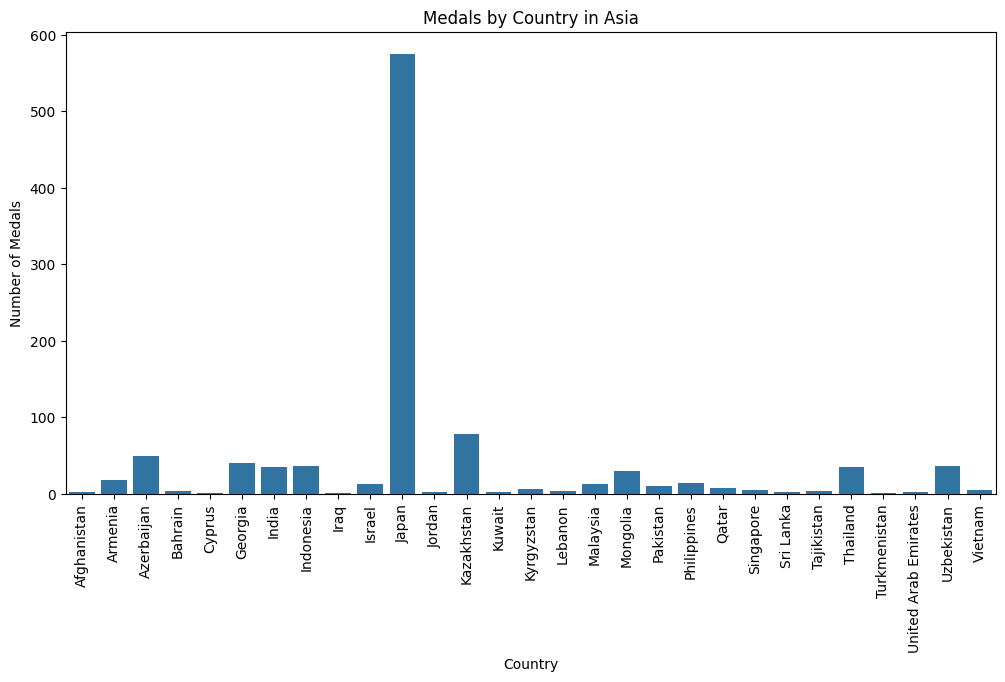

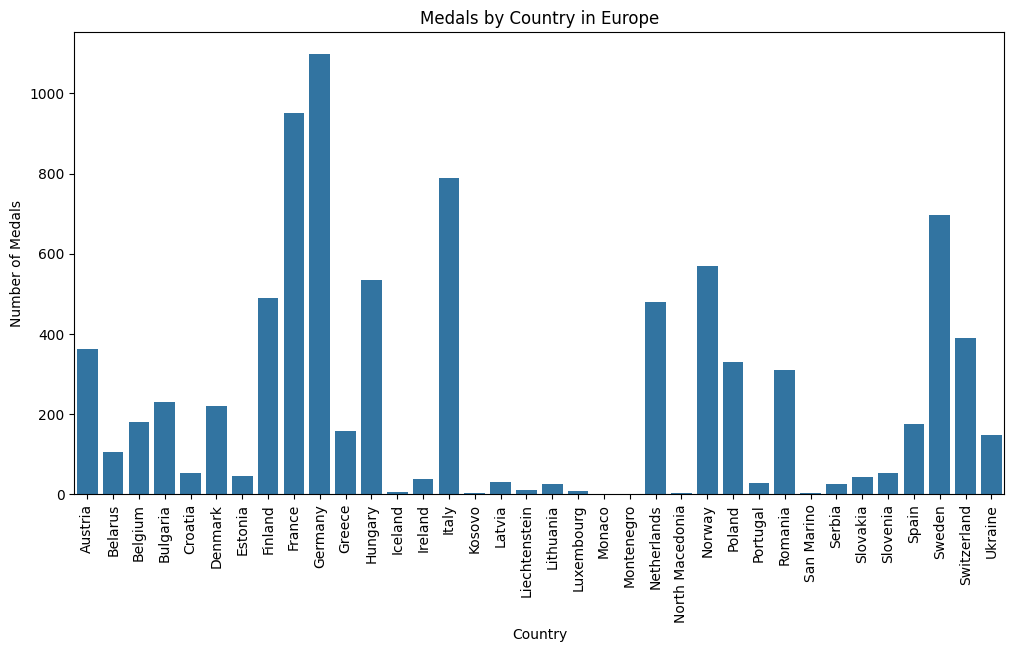

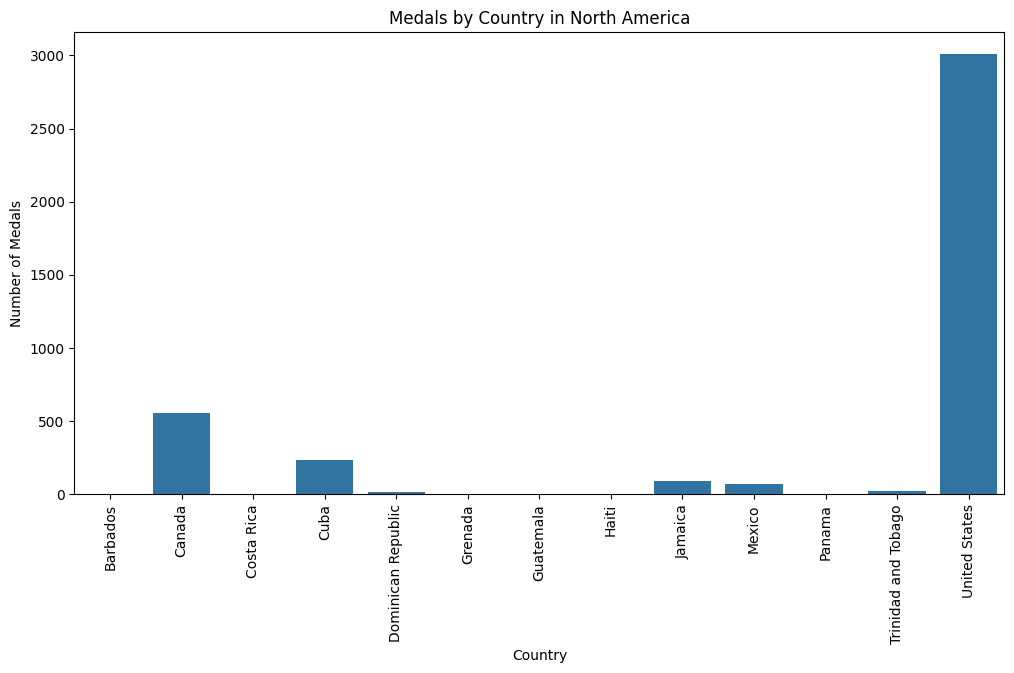

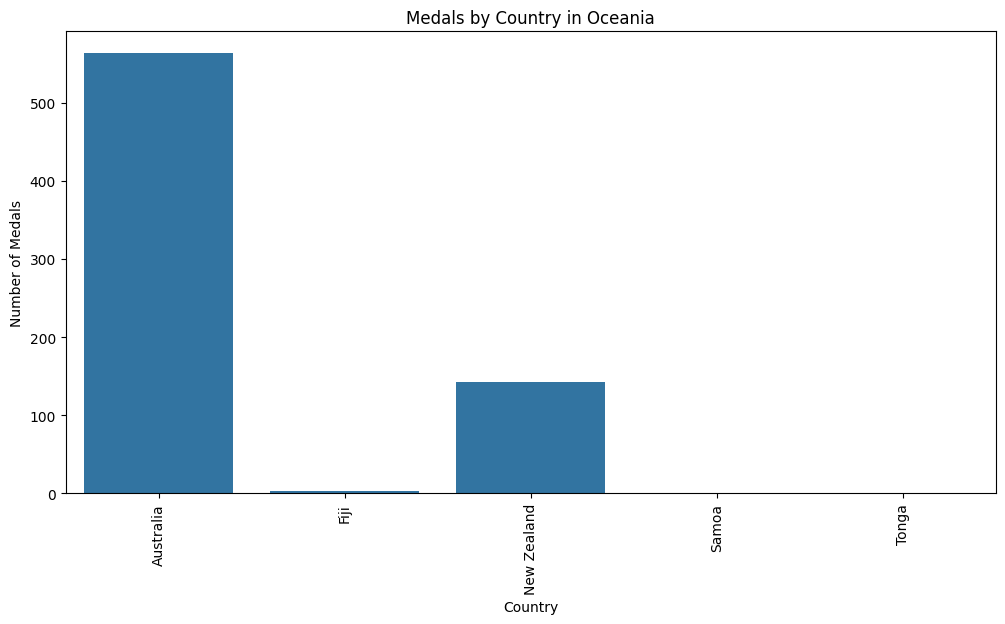

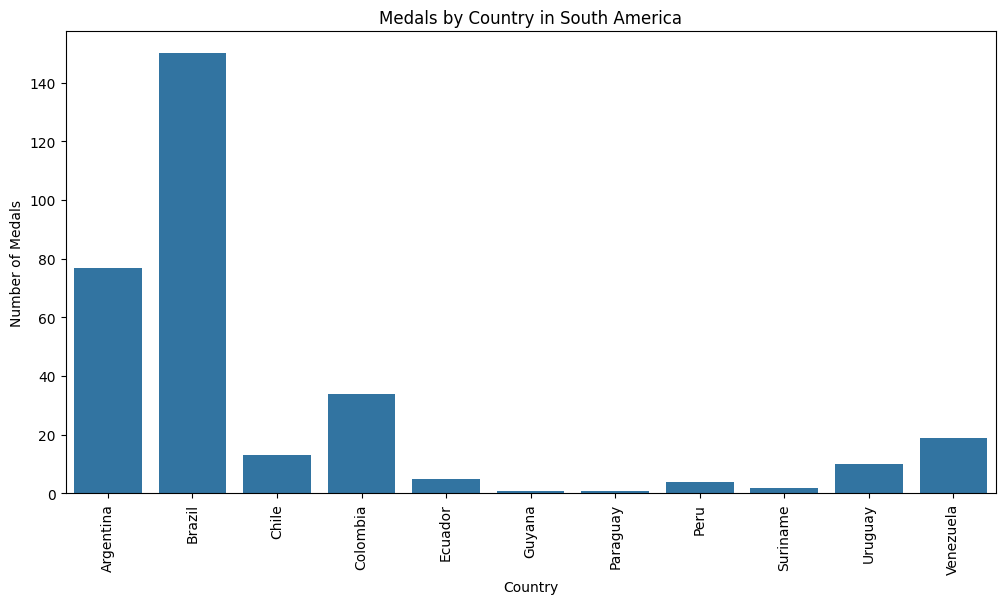

In [80]:
# Correct the column name from 'country' to 'country_y' in the groupby operation
medals_by_continent_country = medal_tally_with_continent.groupby(['Continent', 'country_y'])['total'].sum().reset_index()

# Plot separate graphs for each continent
continents = medals_by_continent_country['Continent'].unique()
for continent in continents:
    plt.figure(figsize=(12, 6))
    continent_data = medals_by_continent_country[medals_by_continent_country['Continent'] == continent]
    sns.barplot(x='country_y', y='total', data=continent_data)
    plt.title(f'Medals by Country in {continent}')
    plt.xlabel('Country')
    plt.ylabel('Number of Medals')
    plt.xticks(rotation=90)
    plt.show()

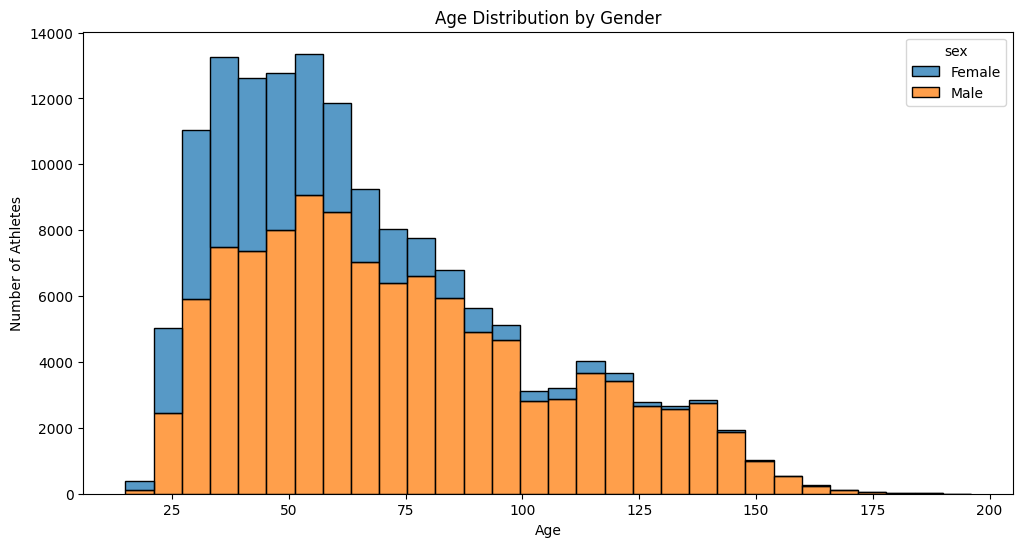

In [81]:
# 3. Compare age distribution of male and female
# Convert 'born' column to datetime if not already done
athlete_bio_df['born'] = pd.to_datetime(athlete_bio_df['born'], errors='coerce')

# Calculate age of athletes
current_year = pd.Timestamp.now().year
athlete_bio_df['age'] = current_year - athlete_bio_df['born'].dt.year

# Plot age distribution for male and female
plt.figure(figsize=(12, 6))
sns.histplot(data=athlete_bio_df, x='age', hue='sex', multiple='stack', bins=30)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.show()

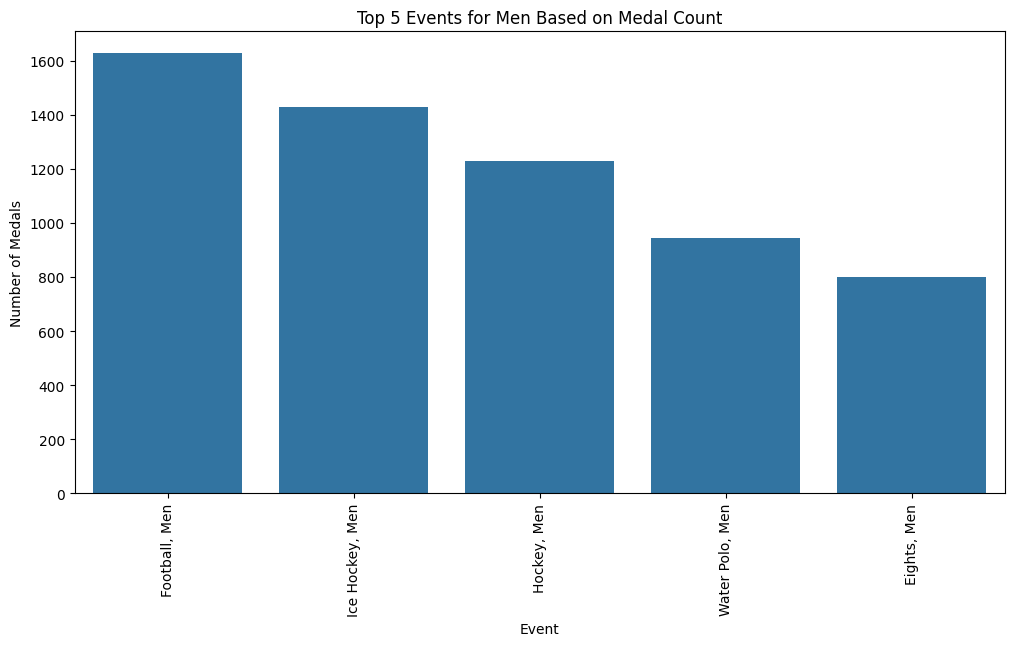

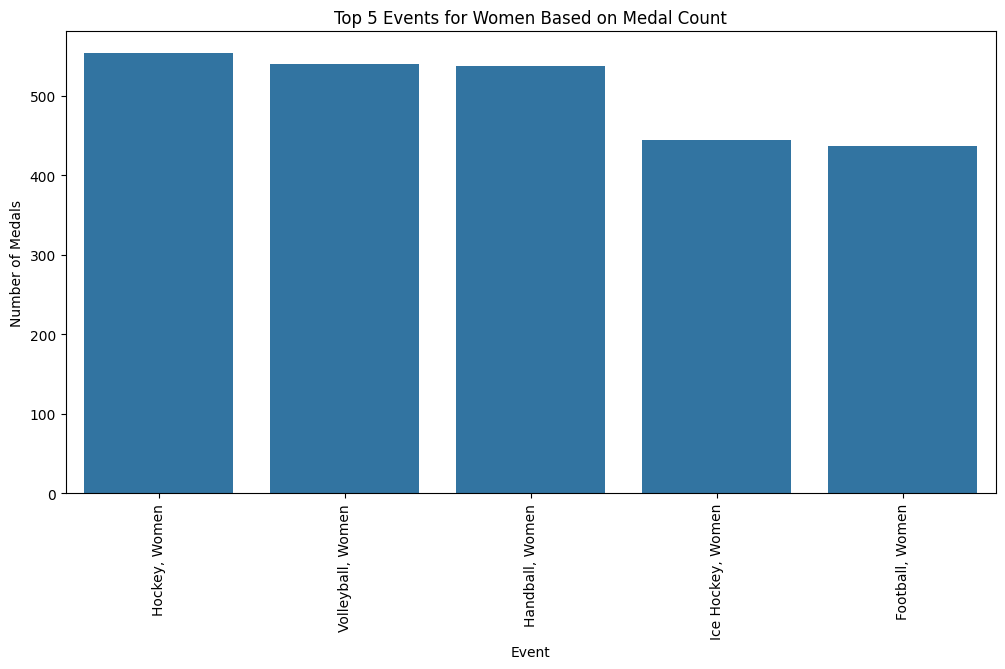

In [82]:
# 4. Top 5 events for each gender based on medal count
# Load the necessary dataset
athlete_event_results = pd.read_csv('data\Olympic_Athlete_Event_Results.csv')

# Merge athlete bio with event results to get gender information
athlete_event_results_with_gender = pd.merge(athlete_event_results, athlete_bio_df[['athlete_id', 'sex']], on='athlete_id')

# Group by event and gender to get the total medals
medals_by_event_gender = athlete_event_results_with_gender.groupby(['event', 'sex'])['medal'].count().reset_index()

# Get the top 5 events for each gender
top_5_events_men = medals_by_event_gender[medals_by_event_gender['sex'] == 'Male'].nlargest(5, 'medal')
top_5_events_women = medals_by_event_gender[medals_by_event_gender['sex'] == 'Female'].nlargest(5, 'medal')

# Plot the top 5 events for men
plt.figure(figsize=(12, 6))
sns.barplot(x='event', y='medal', data=top_5_events_men)
plt.title('Top 5 Events for Men Based on Medal Count')
plt.xlabel('Event')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

# Plot the top 5 events for women
plt.figure(figsize=(12, 6))
sns.barplot(x='event', y='medal', data=top_5_events_women)
plt.title('Top 5 Events for Women Based on Medal Count')
plt.xlabel('Event')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

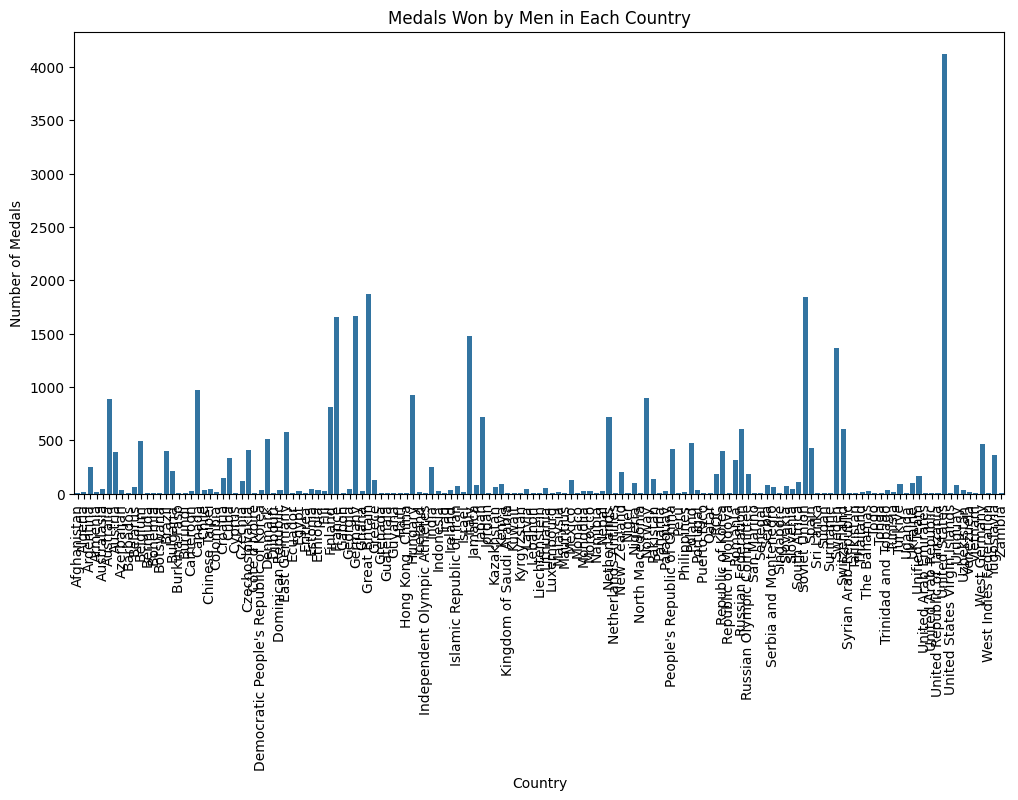

In [83]:
# 5. Visualization of men winning in each country
# Filter the dataset for male athletes who won medals
men_medal_winners = athlete_event_results_with_gender[(athlete_event_results_with_gender['sex'] == 'Male') & (athlete_event_results_with_gender['medal'].notna())]

# Merge with country_info to get the country names
men_medal_winners_with_country = pd.merge(men_medal_winners, country_info, left_on='country_noc', right_on='noc')

# Group by country to get the total medals won by men
men_medals_by_country = men_medal_winners_with_country.groupby('country')['medal'].count().reset_index()
men_medals_by_country.columns = ['Country', 'Number of Medals']

# Plot the medals won by men in each country
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Number of Medals', data=men_medals_by_country)
plt.title('Medals Won by Men in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

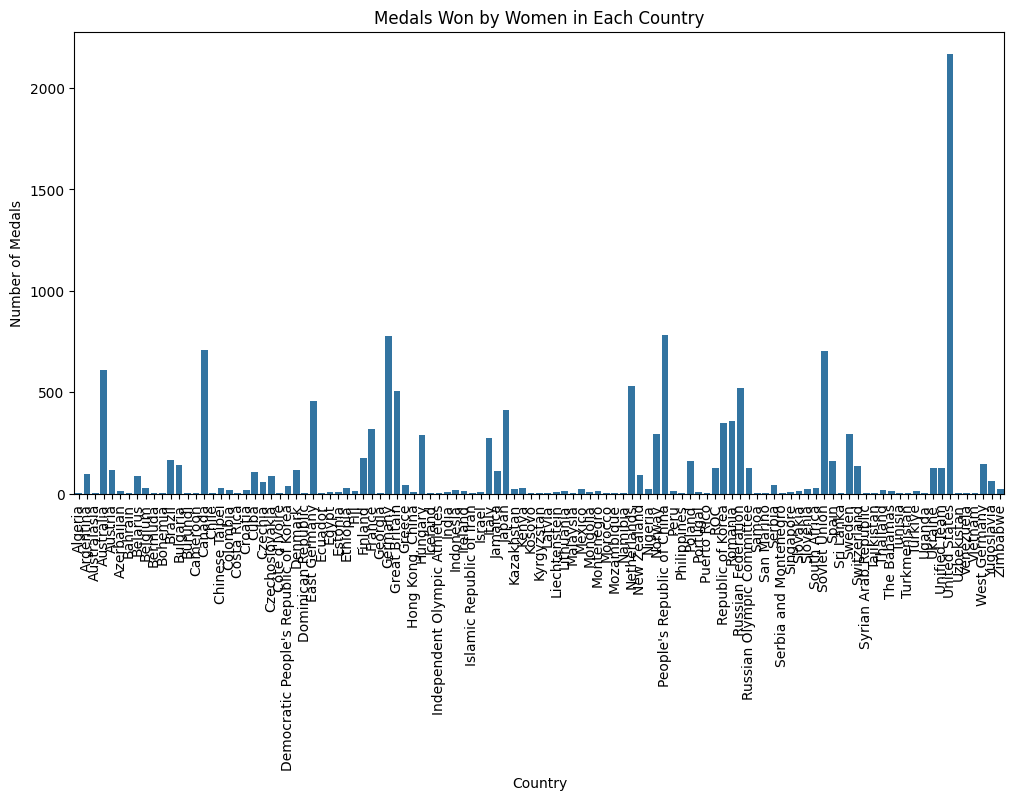

In [84]:
# 6. Visualization of women medal winning in each country
# Filter the dataset for female athletes who won medals
women_medal_winners = athlete_event_results_with_gender[(athlete_event_results_with_gender['sex'] == 'Female') & (athlete_event_results_with_gender['medal'].notna())]

# Merge with country_info to get the country names
women_medal_winners_with_country = pd.merge(women_medal_winners, country_info, left_on='country_noc', right_on='noc')

# Group by country to get the total medals won by women
women_medals_by_country = women_medal_winners_with_country.groupby('country')['medal'].count().reset_index()
women_medals_by_country.columns = ['Country', 'Number of Medals']

# Plot the medals won by women in each country
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Number of Medals', data=women_medals_by_country)
plt.title('Medals Won by Women in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

In [85]:
# 7. Prediction of future top 5 countries winning a gold medal in the Olympics based on this year's statistics

# Get the latest year in the dataset
latest_year = medal_tally['year'].max()

# Filter the dataset for the latest year
latest_year_data = medal_tally[medal_tally['year'] == latest_year]

# Get the top 5 countries based on gold medals in the latest year
top_5_countries_latest_year = latest_year_data.nlargest(5, 'gold')[['country', 'gold']]

# Display the result
top_5_countries_latest_year

,country,gold
1753,Norway,16
1754,Germany,12
1755,People's Republic of China,9
1756,United States,8
1757,Sweden,8


In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the medal tally dataset
medal_tally = pd.read_csv('data\Olympic_Games_Medal_Tally.csv')

# Prepare the data for linear regression
# We will use the year and the number of gold medals as features
medal_tally_gold = medal_tally[['year', 'country', 'gold']]

# Get the unique countries
countries = medal_tally_gold['country'].unique()

# Create a dataframe to store the predictions
future_predictions = pd.DataFrame(columns=['country', 'predicted_gold'])

# Predict the number of gold medals for each country in the next Olympics
next_olympics_year = medal_tally_gold['year'].max() + 4

for country in countries:
    country_data = medal_tally_gold[medal_tally_gold['country'] == country]
    if len(country_data) > 1:  # Need at least two data points to fit a model
        X = country_data['year'].values.reshape(-1, 1)
        y = country_data['gold'].values
        model = LinearRegression()
        model.fit(X, y)
        predicted_gold = model.predict(np.array([[next_olympics_year]]))[0]
        future_predictions = pd.concat([future_predictions, pd.DataFrame({'country': [country], 'predicted_gold': [predicted_gold]})], ignore_index=True)

# Get the top 5 countries predicted to win the most gold medals
top_5_future_predictions = future_predictions.nlargest(5, 'predicted_gold')

top_5_future_predictions

C:\Users\Brinda\AppData\Local\Temp\ipykernel_15984\2234596490.py:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,country,predicted_gold
68,East Germany,54.067039
53,Soviet Union,45.463087
21,Australasia,30.500000
88,Unified Team,27.000000
79,People's Republic of China,23.097222
